<a href="https://colab.research.google.com/github/KyraYang/BackupDouban/blob/master/MFCC_feature_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install soundfile

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import librosa
import soundfile as sf

In [ ]:
audio, sr = sf.read("/content/00834f88e.flac")
audio = audio[0:int(1*sr)] # the first 1s of audio

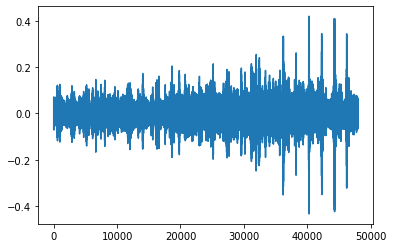

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(audio)


# Extract MFCC using librosa


**parameters**:   
**audio, np.array** (np.ndarray [shape=(n,)])    
**sr, sampling rate of audio.** (We can get sr when read the audio file, but I also saw people set the sr to a perticuliar rate. Don't know the reason yet, may be should be the same rate for camparison between different audio file?)  
**n_mfcc, number of MFCCs to return** (normally 20-40)

In [ ]:
def MFCC_Extract(audio, sr, n_mfcc=40):
    mfccs = librosa.feature.mfcc(y=audio,sr=sr, n_mfcc=n_mfcc, n_fft=1024, n_mels=128, hop_length=512) #parameters that can give a better feature visulize graph in the melspectrogram
    return mfccs

In [ ]:
mfccs = MFCC_Extract(audio, sr)
print(mfccs.shape)

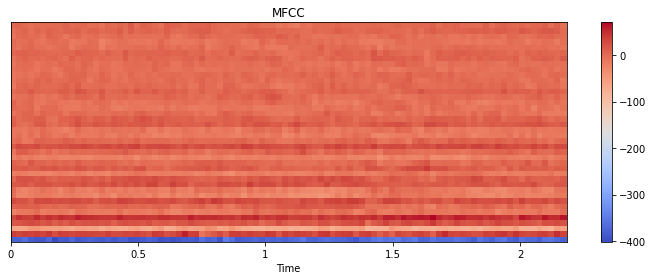

In [ ]:
import librosa.display
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

# Use melspectrogram to visulize the feature

If we want to modify the mfcc calculation, we can modifiy the melspectrogram.

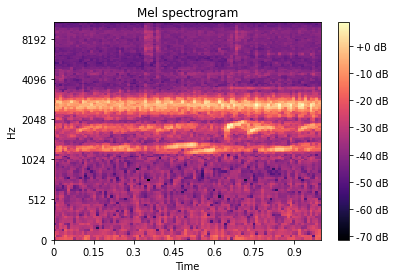

In [ ]:
melspec = librosa.feature.melspectrogram(audio, sr, n_fft=1024, n_mels=128, hop_length=512)
logmelspec = librosa.power_to_db(melspec)     
plt.figure()
librosa.display.specshow(logmelspec, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')   
plt.title('Mel spectrogram')
plt.show()